In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, KFold


In [2]:
df = pd.read_csv('dataset_wiremind.csv')
df.head()

,DocumentRatingSource,FlownYear,FlownMonth,AgentCode,AgentName,POS,POSCountryName,OriginCode,DestinationCode,CargoType,ProductCode,SpecialHandlingCodeList,CommodityCode,ChargeableWeight,Pieces,Revenue
0,XXXX,2017,NOVEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,RC,21.0,1,15.05
1,XXXX,2017,SEPTEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,ZW,13.2,1,9.46
2,XXXX,2017,SEPTEMBER,PJMIGRN,PJMIGWSX3CI1SROQTOOFWTJYDDMKEH,JLL,LVSSPJMDKYSQRCHI,JLL,ZZZ,YYY,X,RWCBA,ZW,15.6,1,9.16
3,XXXX,2017,OCTOBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,ZW,3.0,1,2.15
4,XXXX,2017,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,BW,12.0,1,17.08


## Checking for Missing Values
We need to confirm that there are no missing values in the dataset before proceeding with further analysis. This ensures that we do not run into errors during the modeling process.

In [3]:
df.isnull().sum()

DocumentRatingSource       0
FlownYear                  0
FlownMonth                 0
AgentCode                  0
AgentName                  0
POS                        0
POSCountryName             0
OriginCode                 0
DestinationCode            0
CargoType                  0
ProductCode                0
SpecialHandlingCodeList    0
CommodityCode              0
ChargeableWeight           0
Pieces                     0
Revenue                    0
dtype: int64

No missing values, great! So let's start with the EDA.


In [4]:
df.dtypes

DocumentRatingSource        object
FlownYear                    int64
FlownMonth                  object
AgentCode                   object
AgentName                   object
POS                         object
POSCountryName              object
OriginCode                  object
DestinationCode             object
CargoType                   object
ProductCode                 object
SpecialHandlingCodeList     object
CommodityCode               object
ChargeableWeight           float64
Pieces                       int64
Revenue                    float64
dtype: object

# EDA

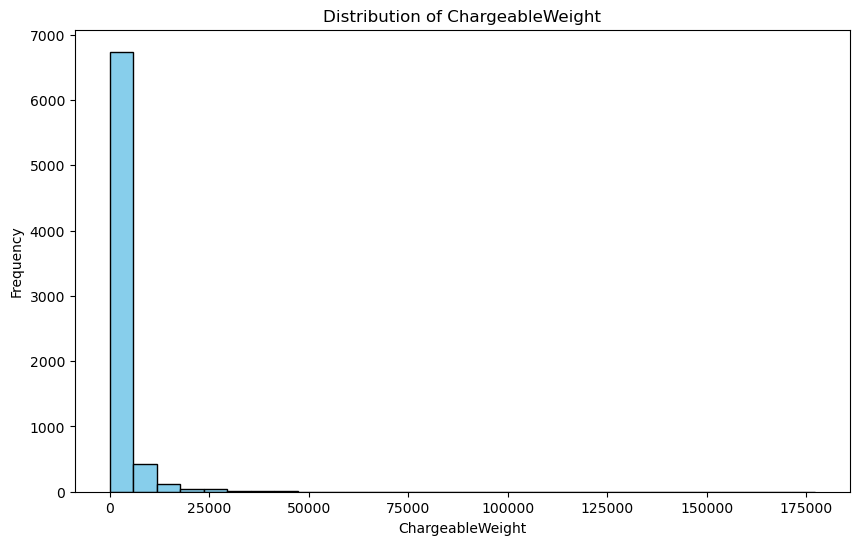

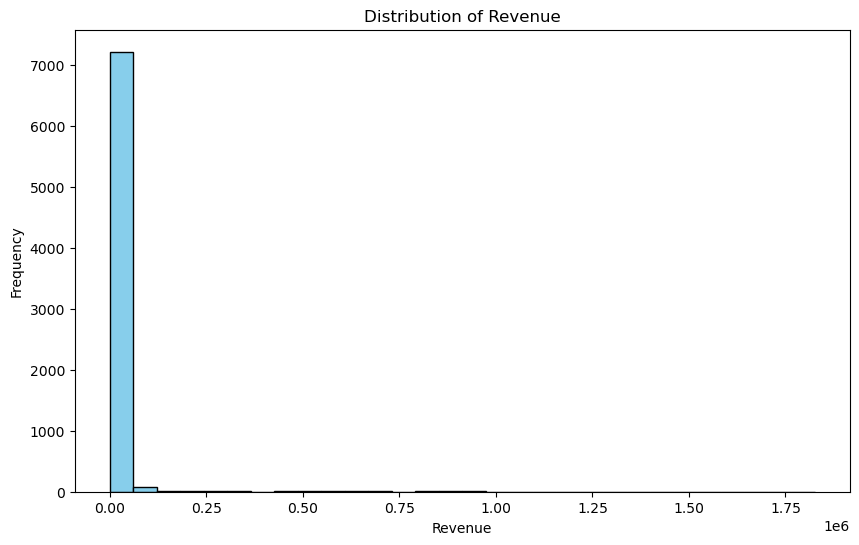

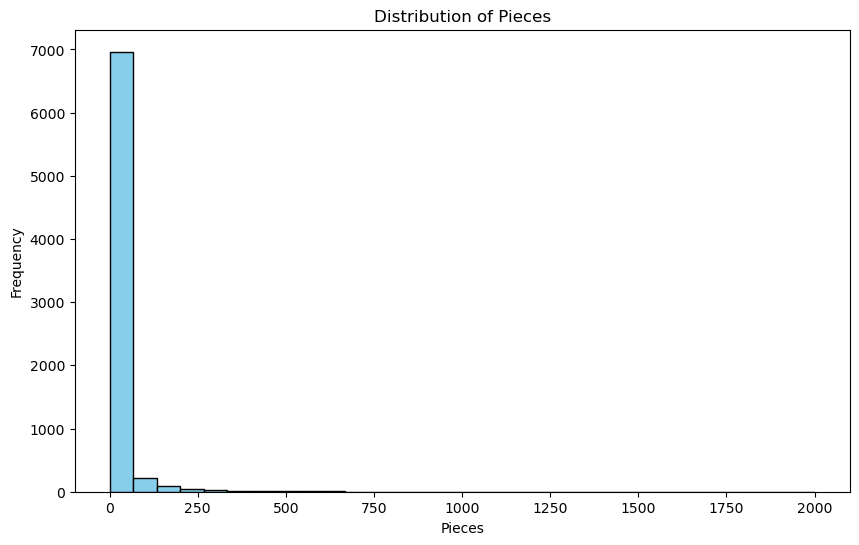

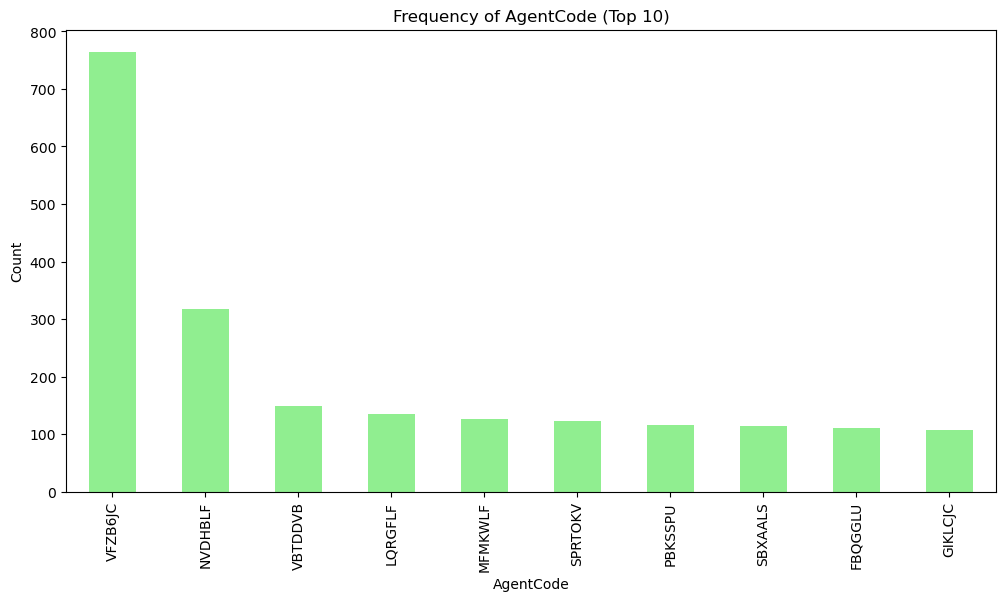

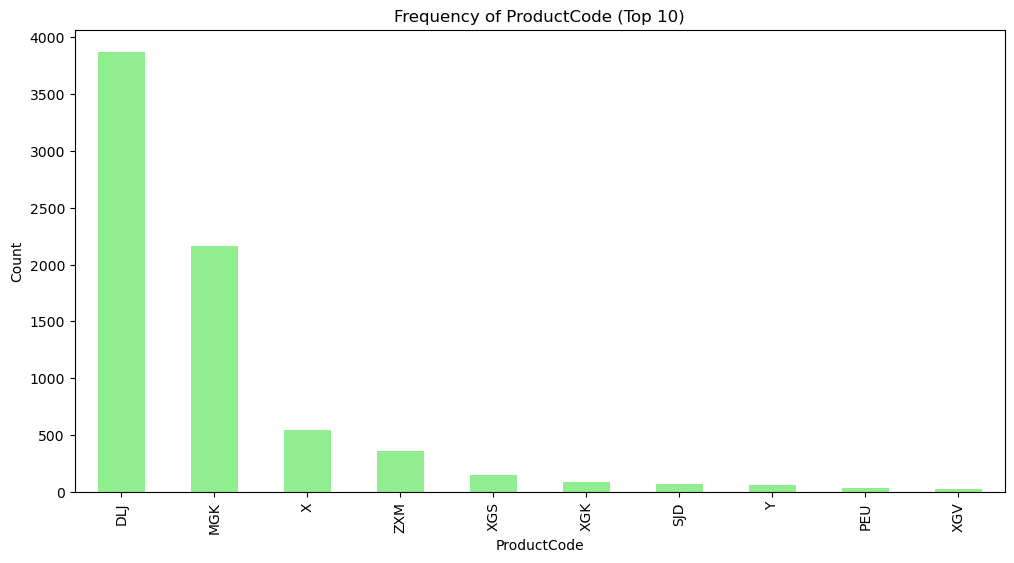

In [5]:
# Plotting basic distributions to better understand whats inside the dataset 
numerical_columns = ['ChargeableWeight', 'Revenue', 'Pieces']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plotting the top 10 categorical feature distributions
categorical_columns = ['AgentCode', 'ProductCode']
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    df[col].value_counts().nlargest(10).plot(kind='bar', color='lightgreen')
    plt.title(f'Frequency of {col} (Top 10)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


In [6]:
df.describe().round(0).astype(int)

,FlownYear,ChargeableWeight,Pieces,Revenue
count,7420,7420,7420,7420
mean,2017,2277,21,13534
std,0,5992,68,90309
min,2017,0,1,0
25%,2017,177,1,185
50%,2017,639,5,470
75%,2017,1998,14,1639
max,2017,177078,2000,1825425


Generated a summary of the dataset with rounded values to get an overview of the central tendency and distribution without decimals.


Checking the column names in the dataset to understand the available features.


In [7]:
df.columns

Index(['DocumentRatingSource', 'FlownYear', 'FlownMonth', 'AgentCode',
       'AgentName', 'POS', 'POSCountryName', 'OriginCode', 'DestinationCode',
       'CargoType', 'ProductCode', 'SpecialHandlingCodeList', 'CommodityCode',
       'ChargeableWeight', 'Pieces', 'Revenue'],
      dtype='object')

Counting the number of unique values for each column to identify categorical features and assess the variability of the data.


In [8]:
for i in df.columns:
    print(i, len(df[i].unique()))

DocumentRatingSource 6
FlownYear 1
FlownMonth 3
AgentCode 679
AgentName 664
POS 147
POSCountryName 62
OriginCode 144
DestinationCode 1
CargoType 3
ProductCode 18
SpecialHandlingCodeList 552
CommodityCode 222
ChargeableWeight 2358
Pieces 292
Revenue 5475


##### we can see that we have only 1 year for FlownYear (2017), 1 destination for DestinationCode so we can remove them because they won't help our model 

In [9]:
#create a copy of the original DataFrame to preserve the original data
new_df = df.copy()
#drop unnecessary columns that are not needed for analysis
new_df = new_df.drop(["DocumentRatingSource","FlownYear","DestinationCode" ], axis =1)
new_df.head()

,FlownMonth,AgentCode,AgentName,POS,POSCountryName,OriginCode,CargoType,ProductCode,SpecialHandlingCodeList,CommodityCode,ChargeableWeight,Pieces,Revenue
0,NOVEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,YYY,X,RWCBA,RC,21.0,1,15.05
1,SEPTEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,YYY,X,RWCBA,ZW,13.2,1,9.46
2,SEPTEMBER,PJMIGRN,PJMIGWSX3CI1SROQTOOFWTJYDDMKEH,JLL,LVSSPJMDKYSQRCHI,JLL,YYY,X,RWCBA,ZW,15.6,1,9.16
3,OCTOBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,YYY,X,RWCBA,ZW,3.0,1,2.15
4,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,YYY,X,RWCBA,BW,12.0,1,17.08


In [10]:
#calculate the target variable as revenue per ChargeableWeight
new_df["target"] = new_df["Revenue"]/ new_df["ChargeableWeight"]
#display the first few rows to verify the new 'target' column
new_df.head()

,FlownMonth,AgentCode,AgentName,POS,POSCountryName,OriginCode,CargoType,ProductCode,SpecialHandlingCodeList,CommodityCode,ChargeableWeight,Pieces,Revenue,target
0,NOVEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,YYY,X,RWCBA,RC,21.0,1,15.05,0.716667
1,SEPTEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,YYY,X,RWCBA,ZW,13.2,1,9.46,0.716667
2,SEPTEMBER,PJMIGRN,PJMIGWSX3CI1SROQTOOFWTJYDDMKEH,JLL,LVSSPJMDKYSQRCHI,JLL,YYY,X,RWCBA,ZW,15.6,1,9.16,0.587179
3,OCTOBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,YYY,X,RWCBA,ZW,3.0,1,2.15,0.716667
4,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,YYY,X,RWCBA,BW,12.0,1,17.08,1.423333


In [11]:
new_df.describe().round(0).astype(int)

,ChargeableWeight,Pieces,Revenue,target
count,7420,7420,7420,7420
mean,2277,21,13534,13
std,5992,68,90309,70
min,0,1,0,0
25%,177,1,185,0
50%,639,5,470,1
75%,1998,14,1639,3
max,177078,2000,1825425,4329


Summary statistics of the modified dataset to assess the updated features and new target variable.


### MONTHS ANALYSIS: 

Calculating the average Chargeable Weight, Revenue, and Target for each month to understand trends over time.


In [12]:
month_avg = new_df.groupby('FlownMonth')[["ChargeableWeight", 'Revenue', 'target']].mean()
month_avg

,ChargeableWeight,Revenue,target
FlownMonth,,,
NOVEMBER,2189.882987,16635.452506,11.574864
OCTOBER,2315.619787,14417.736860,13.795055
SEPTEMBER,2330.017587,9190.288273,13.742163


In [13]:
#count the number of shipments for each month
monthly_shipments = new_df['FlownMonth'].groupby(df['FlownMonth']).size()
print(monthly_shipments)
#calculate the percentage of shipments for each month
monthly_percentage = (monthly_shipments / len(new_df)) * 100

monthly_percentage.round(3)

FlownMonth
NOVEMBER     2551
OCTOBER      2532
SEPTEMBER    2337
Name: FlownMonth, dtype: int64


FlownMonth
NOVEMBER     34.380
OCTOBER      34.124
SEPTEMBER    31.496
Name: FlownMonth, dtype: float64

The output shows that the distribution of shipments across different months is relatively balanced, with each month contributing between 31.49% and 34.38% of the total shipments. This suggests that there is no **major** seasonality effect in shipment frequency.


Visualizing the average revenue and average revenue per kg (target) by month to identify any trends or seasonality effects.


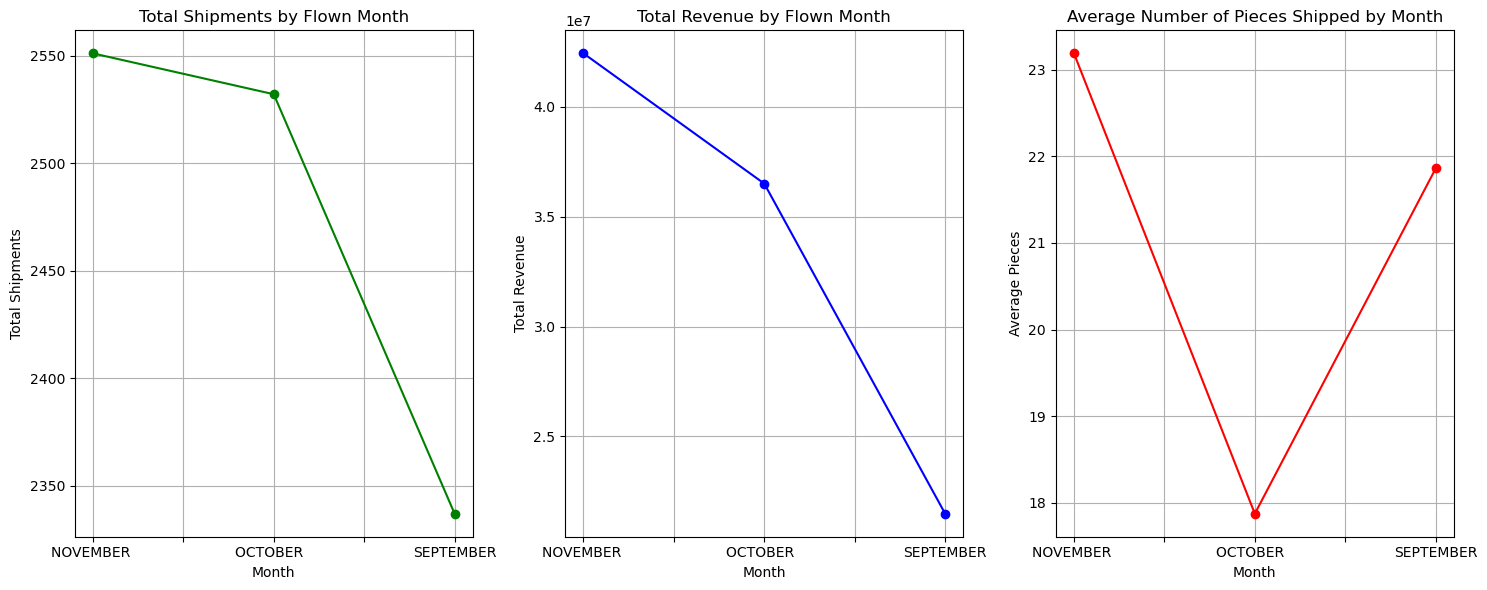

In [14]:
metrics = ['FlownMonth', 'Revenue', 'Pieces']
titles = ['Total Shipments by Flown Month', 'Total Revenue by Flown Month', 'Average Number of Pieces Shipped by Month']
y_labels = ['Total Shipments', 'Total Revenue', 'Average Pieces']
colors = ['g', 'b', 'r']

plt.figure(figsize=(15, 6))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    if metric == 'FlownMonth':
        # Count the number of shipments per month for the first graph
        df_grouped_by_month = df.groupby('FlownMonth').size()
    elif metric == 'Pieces' and i == 2:
        # Calculate the average number of pieces shipped by month for the third graph
        df_grouped_by_month = df.groupby('FlownMonth')[metric].mean()
    else:
        df_grouped_by_month = df.groupby('FlownMonth')[metric].sum()
    
    df_grouped_by_month.plot(kind='line', marker='o', color=colors[i])
    plt.title(titles[i])
    plt.xlabel('Month')
    plt.ylabel(y_labels[i])
    plt.grid(True)

plt.tight_layout()  
plt.show()


### Total Shipments and Revenue Trends:
November shows the highest total number of shipments and revenue, followed by October, with September having the lowest figures. This indicates that November might be a peak period, potentially due to seasonal demand or promotional activities. 

We can also see that the average number of pieces shipped by month is the lowest in october, we will have to conduct another analysis to see if the number of pieces has a role to play with the total weight of each shipment 


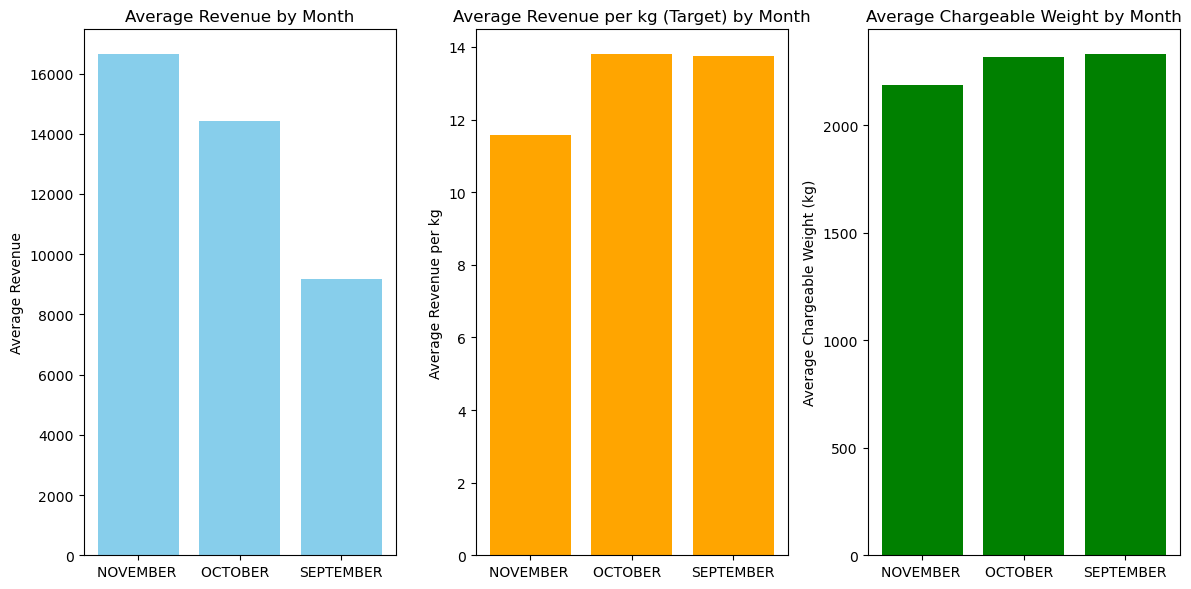

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
monthly_weight_mean = new_df.groupby('FlownMonth')['ChargeableWeight'].mean()
#plot for average revenue by month
ax[0].bar(month_avg.index, month_avg['Revenue'], color='skyblue')
ax[0].set_title('Average Revenue by Month')
ax[0].set_ylabel('Average Revenue')

#plot for average revenue per kg (target = revenue/chargeable weight)
ax[1].bar(month_avg.index, month_avg['target'], color='orange')
ax[1].set_title('Average Revenue per kg (Target) by Month')
ax[1].set_ylabel('Average Revenue per kg')

ax[2].bar(monthly_weight_mean.index, monthly_weight_mean, color='green')
ax[2].set_title('Average Chargeable Weight by Month')
ax[2].set_ylabel('Average Chargeable Weight (kg)')

plt.tight_layout()
plt.show()

### Global Analysis of Shipment and Revenue Trends

The visualizations provide an initial overview of the shipment and revenue patterns across the months of September, October, and November. Here's a summary of the observations:


   
insights:

1. **Average Revenue and Revenue per kg**:
   - The average revenue per shipment is also the highest in November, aligning with the total revenue pattern. However, the average revenue per kg in November is lower compared to October and September. 

2. 
we ship fewer pieces in october (previous cell 3rd plot) but with the new graphs we can see that the average revenue per kg is the highest in october and that the average weight per shipment is also higher in october which might mean that in october they ship heavier items (pieces) that are more expensive.

3. **This could indicate that shipments in November are larger in volume but involve lower pricing per unit weight.**


### Next Steps
To gain deeper insights into these patterns, further analysis will be conducted focusing on:
   - **Cargo Type**: Understanding which cargo types dominate during these months and how they impact overall revenue and efficiency.
   - **Product Type**: Exploring the specific products shipped and their influence on revenue per kg and shipment volume.
   - **Delivery Agents**: Investigating how different delivery agents contribute to these patterns, which could reveal whether certain agents specialize in specific types of cargo or regions.

These additional dimensions will help refine the analysis and provide more targeted explanations for the observed trends.


### CARGO TYPE ANALYSIS: 

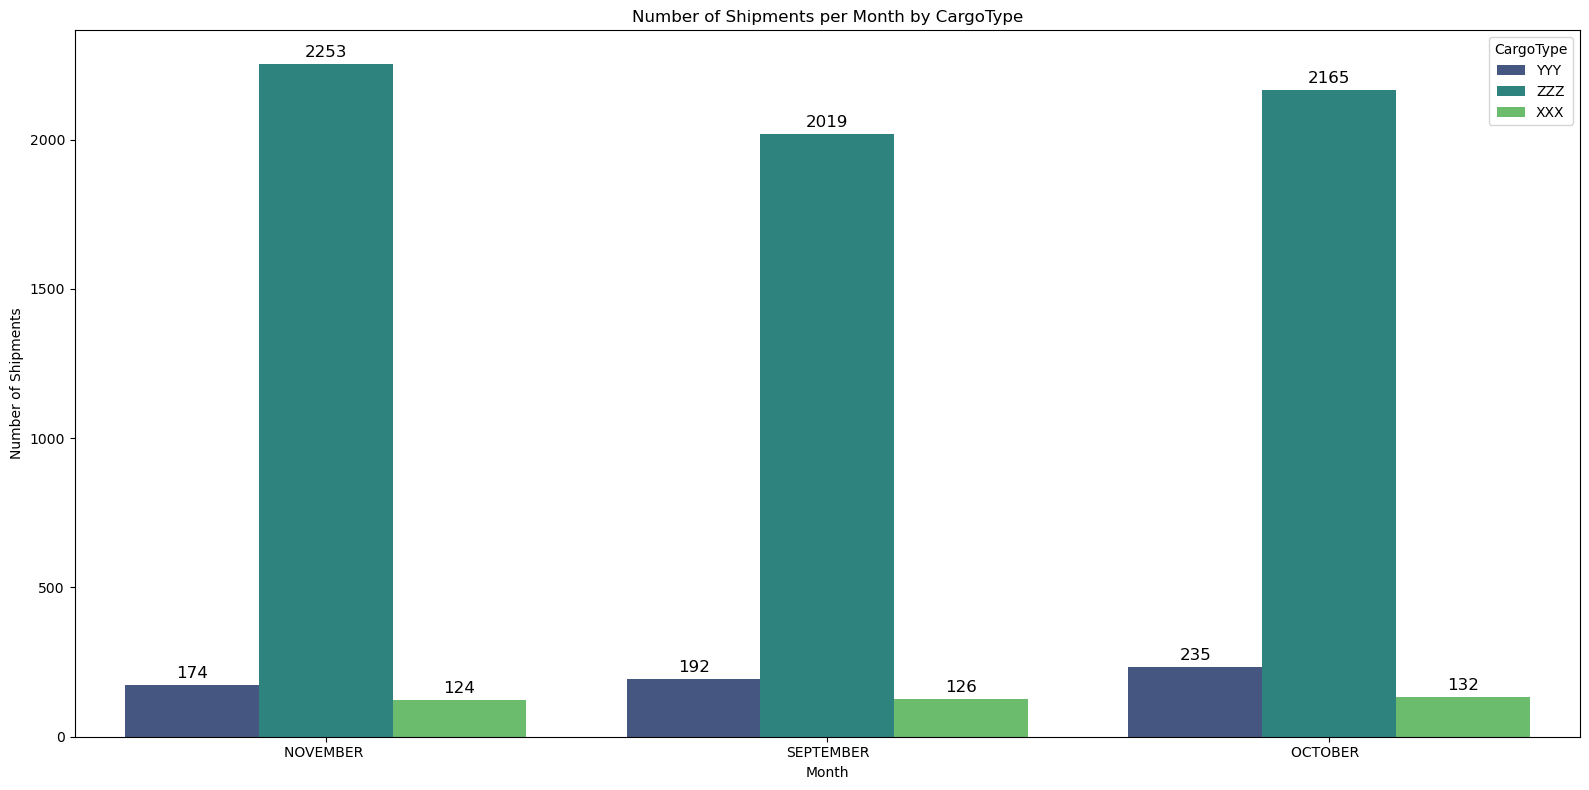

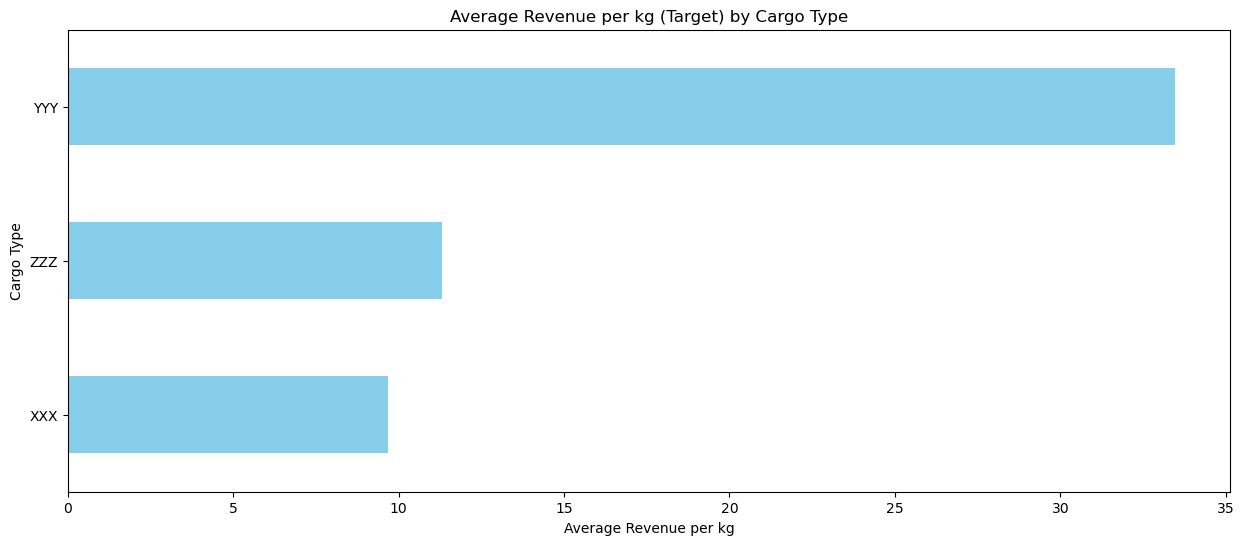

In [16]:
# Create the plot
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=df, x='FlownMonth', hue='CargoType', palette='viridis')

# for loop to exactly see the number of different type of cargotype shipment made per month
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', 
                fontsize=12, color='black', xytext = (0, 5), 
                textcoords = 'offset points')

#adding titles and labels
plt.title('Number of Shipments per Month by CargoType')
plt.xlabel('Month')
plt.ylabel('Number of Shipments')
plt.legend(title='CargoType')
plt.tight_layout()

# Show the plot
plt.show()

# Grouping the dataset by cargotype to calculate the average target for each type
average_target_per_cargo = new_df.groupby('CargoType')['target'].mean().sort_values()

# Plotting the average target per cargo type
plt.figure(figsize=(15, 6))
average_target_per_cargo.plot(kind='barh', color='skyblue')
plt.title('Average Revenue per kg (Target) by Cargo Type')
plt.xlabel('Average Revenue per kg')
plt.ylabel('Cargo Type')
plt.show()


### Link Between Shipment Volume and Revenue per kg by Cargo Type

The two graphs provide complementary insights into the shipment patterns and the revenue efficiency per kilogram across different cargo types. Here's how they are connected:

1. **Shipment Volume by Cargo Type**:
   - The first graph shows the number of shipments per month for each cargo type. It is evident that **ZZZ** dominates the shipment volume in all months, with significantly higher counts compared to **YYY** and **XXX**. This suggests that **ZZZ** is the most commonly shipped cargo type, contributing the most to the overall shipment count.

2. **Revenue Efficiency per kg by Cargo Type**:
   - The second graph displays the average revenue per kilogram for each cargo type. Interestingly, **YYY** has the highest revenue per kilogram, while **ZZZ**, despite its dominance in volume, has a lower revenue efficiency. **XXX** also shows lower revenue per kg compared to **YYY**.

3. **Interpretation**:
   - The relationship between these graphs indicates that while **ZZZ** is the most frequently shipped, it is not the most profitable per unit weight. The high volume of **ZZZ** shipments likely targets bulk orders or less valuable products, which explains its lower revenue per kg. 
   - On the other hand, **YYY**, although shipped in smaller quantities, commands a much higher revenue per kilogram **(2.75 times more expensive per kilogram than ZZZ and 3.67 times more expensive per kilogram than XXX)**. 
   
This suggests that **YYY** might be reserved for high-value or premium products, which justify the higher pricing. 


### Product Type analysis:

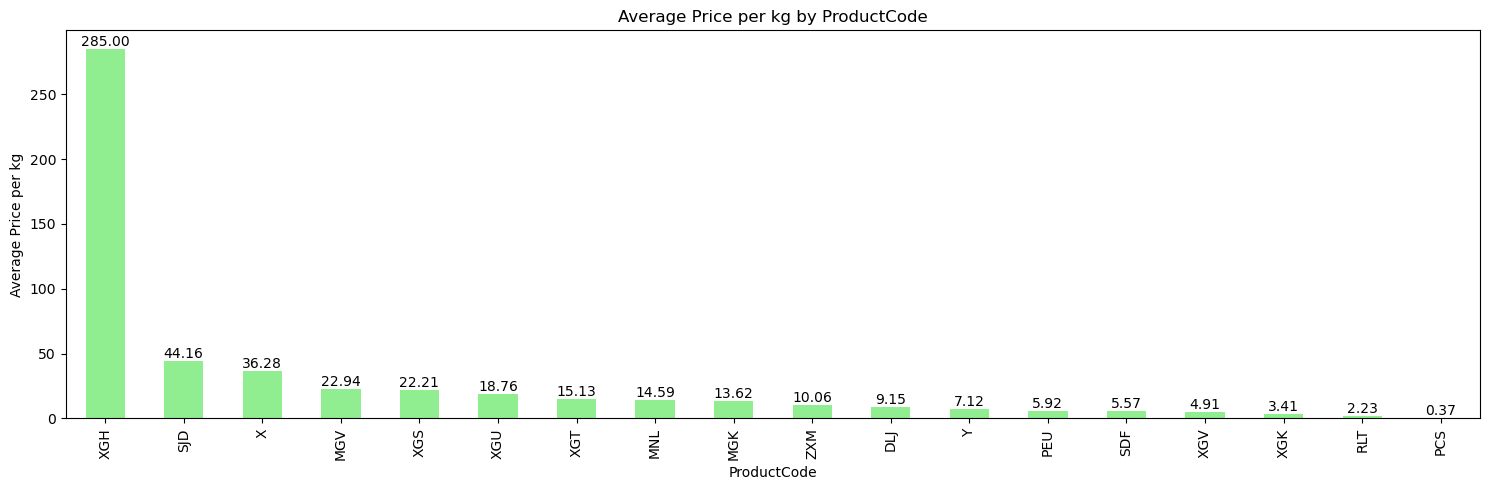

In [17]:
# Bar chart for average Price_per_kg by ProductCode
plt.figure(figsize=(15, 5))

# Calculate the mean price per kg for each product code
product_code_avg_price = new_df.groupby('ProductCode')['target'].mean().sort_values(ascending=False)

# Plot the bar chart
ax = product_code_avg_price.plot(kind='bar', color='lightgreen')
plt.title('Average Price per kg by ProductCode')
plt.ylabel('Average Price per kg')
plt.xticks(rotation=90)
plt.tight_layout()

# Add the numbers on top of the bars
for index, value in enumerate(product_code_avg_price):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Display the plot
plt.show()





The **average target value (revenue per kg)** for each product code shows significant variation across different product types:

- The product code **XGH** has the highest average target value of 285, which is much greater than other products. This suggests that **XGH** may be an outlier, potentially biasing our analysis.
- Other product codes, such as **SJD** and **X**, also have relatively high average target values, while **PCS** has the lowest.
- The substantial difference between the highest and lowest average target values suggests that certain products may disproportionately impact the overall revenue per kg.

To ensure the robustness of our model, it might be worth considering whether the extreme values, such as **XGH**, should be treated as outliers and possibly removed or further investigated.


In [18]:
#counting the number of time we have the productcode XGH in our dataset 
# This helps identify how many times this outlier (product code "XGH") is repeated
len(new_df.loc[new_df['ProductCode'] == "XGH"])

1

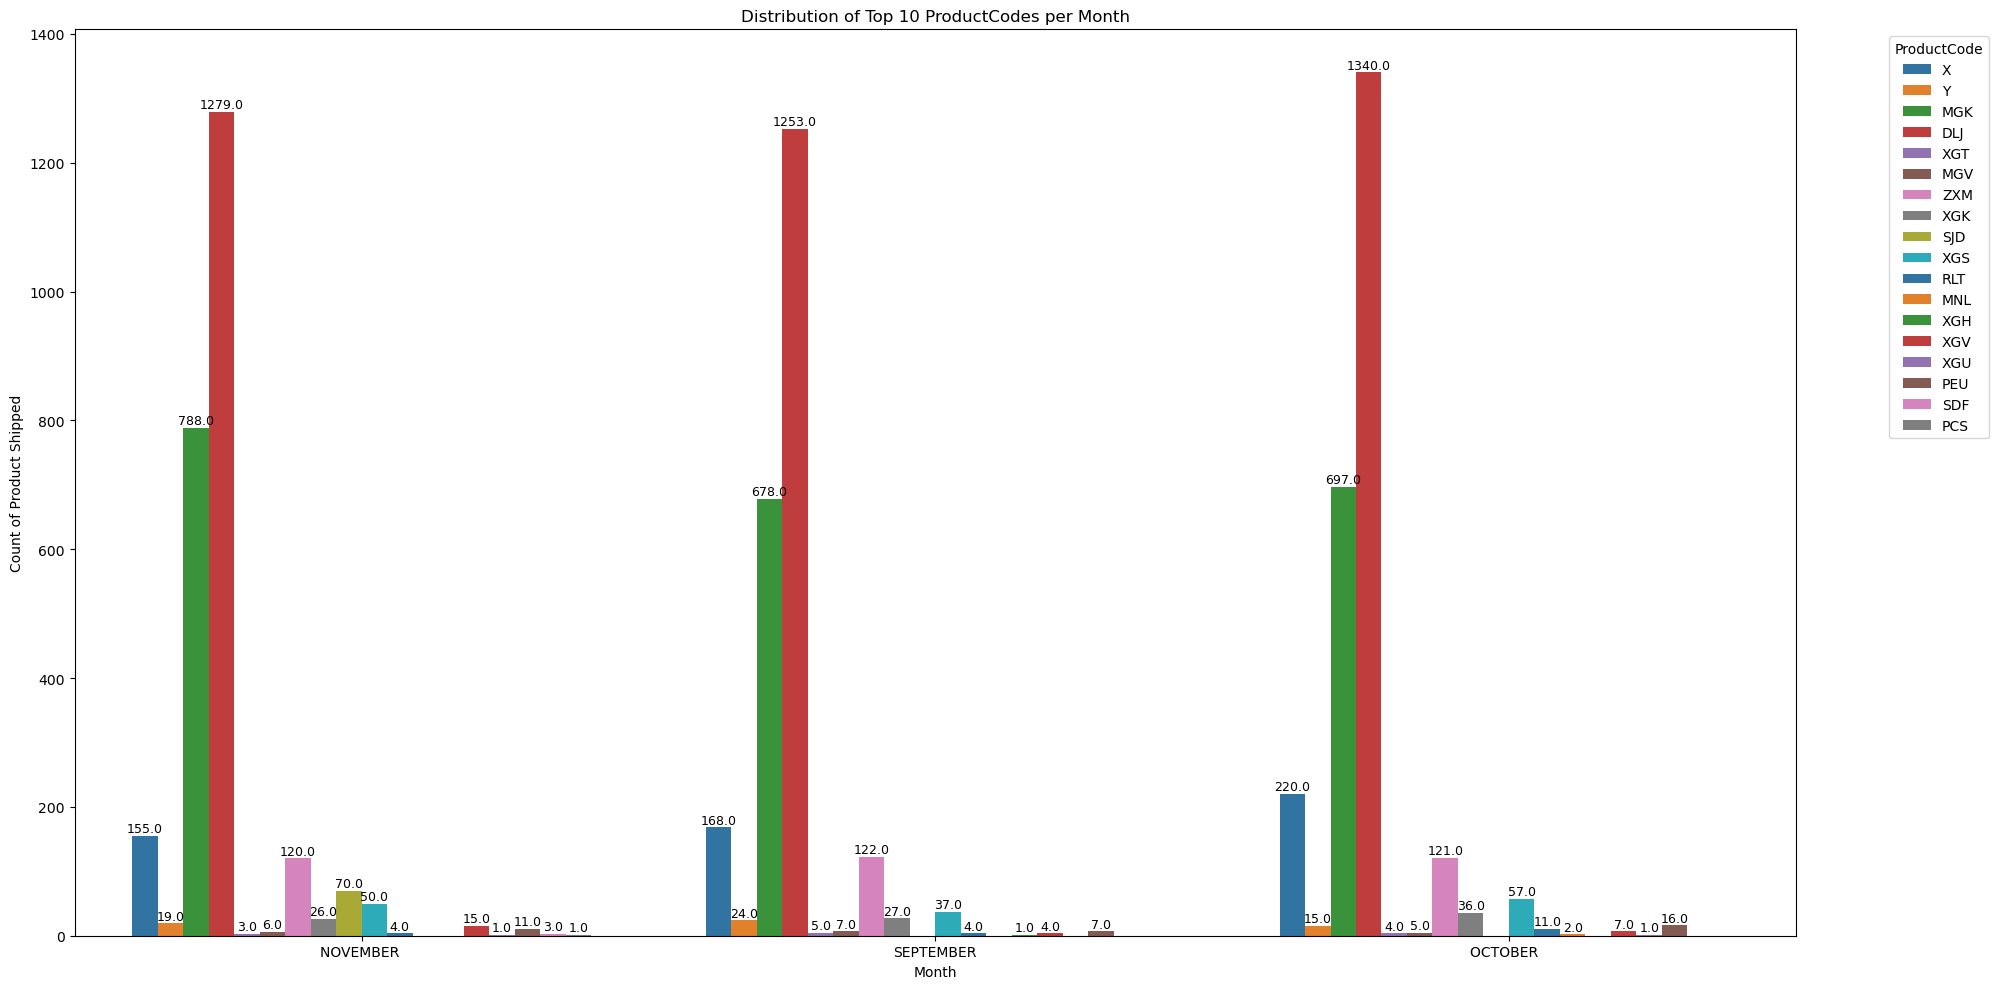

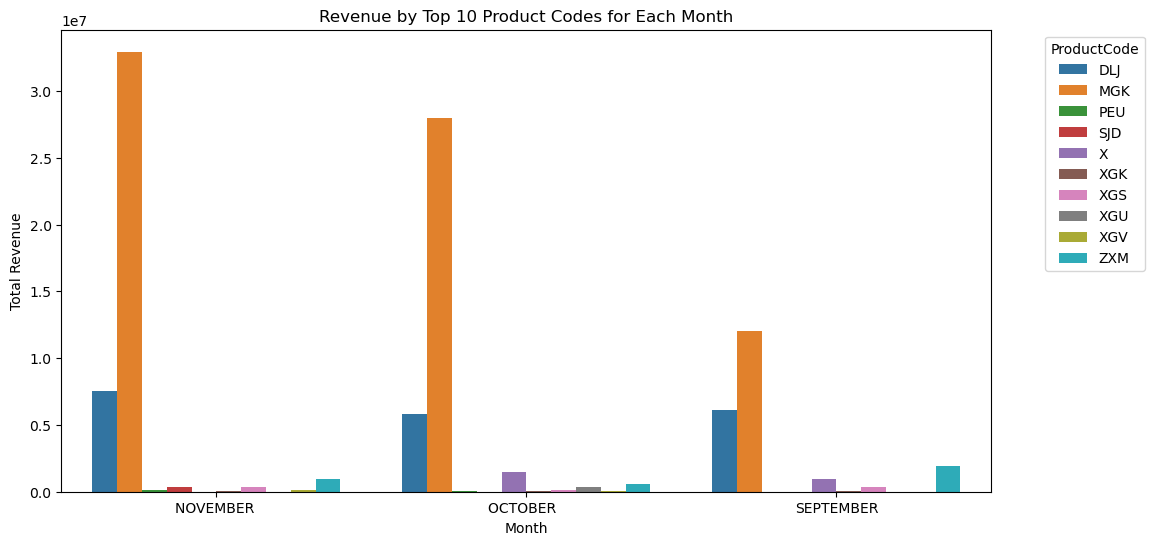

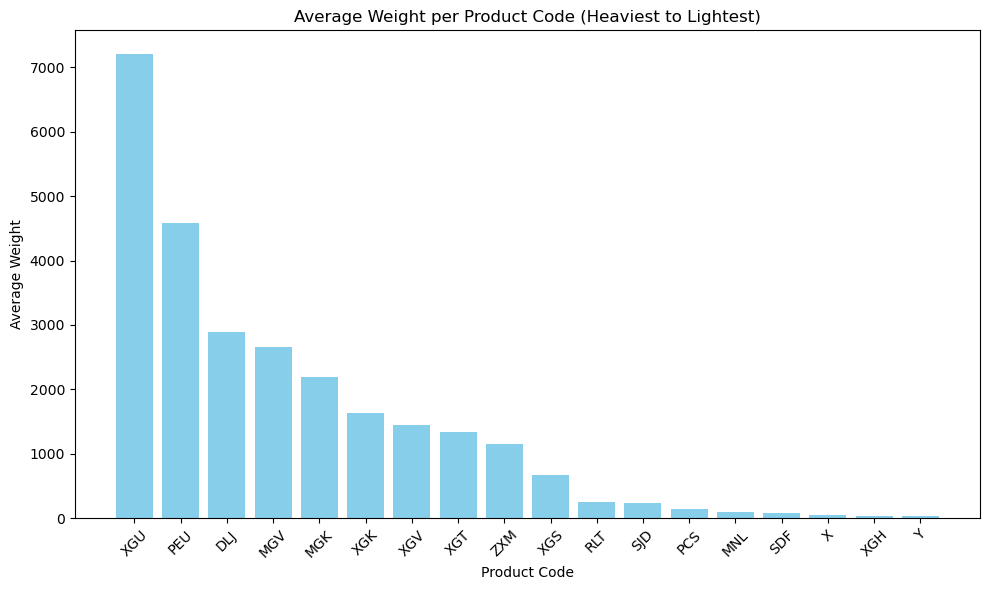

In [19]:
# Filter to keep only the top 10 most shipped ProductCodes
top_10_products = df['ProductCode'].value_counts().nlargest(20).index
filtered_df = df[df['ProductCode'].isin(top_10_products)]
plt.figure(figsize=(20, 10))
ax = sns.countplot(data=filtered_df, x='FlownMonth', hue='ProductCode', palette='tab10')

plt.title('Distribution of Top 10 ProductCodes per Month')
plt.xlabel('Month')
plt.ylabel('Count of Product Shipped')
plt.xticks(rotation=0)
plt.legend(title='ProductCode', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotating each bar with the count
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if there is a count
        ax.text(
            p.get_x() + p.get_width() / 2.,  # x position: center of the bar
            height + 1,  # y position: just above the bar
            f'{height}',  # the value to display
            ha='center', va='bottom', fontsize=9, color='black'
        )

plt.tight_layout()
plt.show()


revenue_per_product_per_month = new_df.groupby(['ProductCode', 'FlownMonth'])['Revenue'].sum().reset_index()

# Find the top 10 product codes with the highest total revenue across all months
top_10_products = revenue_per_product_per_month.groupby('ProductCode')['Revenue'].sum().nlargest(10).index

# Filter the dataset to include only the top 10 product codes
top_10_revenue_per_product_per_month = revenue_per_product_per_month[revenue_per_product_per_month['ProductCode'].isin(top_10_products)]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_revenue_per_product_per_month, x='FlownMonth', y='Revenue', hue='ProductCode')
plt.title('Revenue by Top 10 Product Codes for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='ProductCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


average_weights = df.groupby('ProductCode')['ChargeableWeight'].mean().reset_index()

# Sort the average weights in descending order (heaviest to lightest)
average_weights = average_weights.sort_values(by='ChargeableWeight', ascending=False)

# Plotting the average weight for each product code
plt.figure(figsize=(10, 6))
plt.bar(average_weights['ProductCode'], average_weights['ChargeableWeight'], color='skyblue')
plt.xlabel('Product Code')
plt.ylabel('Average Weight')
plt.title('Average Weight per Product Code (Heaviest to Lightest)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The plots above reveal key insights into product performance across different months:

**Distribution of Top 10 Product Codes per Month:**
- The product code **DLJ** is consistently the most shipped product across all months, with significantly higher shipment counts compared to other products.
- Despite DLJ’s volume dominance, it does not generate the highest revenue, indicating it may be a lower-value or bulk product.

**Revenue by Top 10 Product Codes for Each Month:**
- The product code **MGK**, although shipped far less frequently than DLJ, generates the most revenue across all months 
ps: MGK 48.91% more expensive than DLJ [((13.62-9.15)/9.15)  *100] (we get the information from the graph showing the average price per kg per product code )


These observations highlight that while DLJ dominates in terms of shipment volume but MGK is the primary driver of revenue. This contrast suggests that different strategies may be needed to manage each product type effectively.

### Agents shipping Analysis: 

#### plot the top 30 agents with the highest average price per kg 

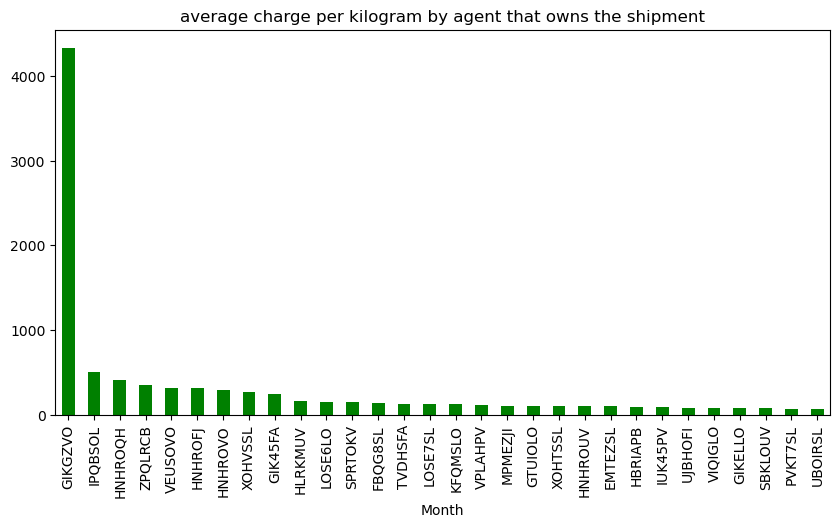

/var/folders/zw/qxn4x_914yg293_ng4p2kr6h0000gn/T/ipykernel_48853/2055858402.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='target', y='AgentCode', data=new_df, order=agent_impact[:15].index, palette='deep')
/Users/nadimaizarani/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nadimaizarani/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nadimaizarani/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 85.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nadimaizaran

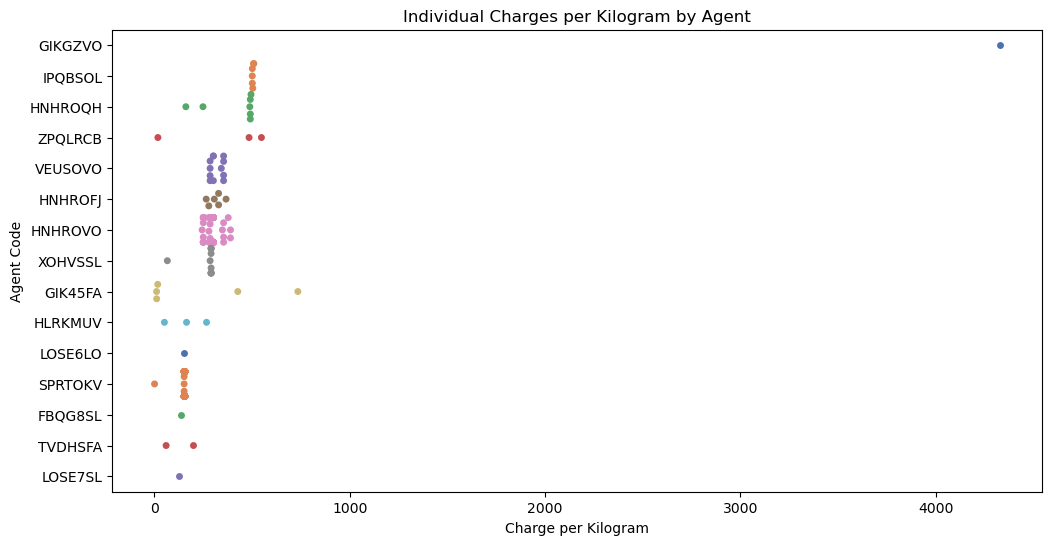

In [20]:
agent_impact = new_df.groupby('AgentCode')['target'].mean().sort_values(ascending=False)
#print(agent_impact.head(10))
plt.figure(figsize=(10, 5))
agent_impact[:30].plot(kind='bar', color='green')
#titles and labels for better readability 
plt.title('average charge per kilogram by agent that owns the shipment')
plt.xlabel('Month')
plt.show()
plt.figure(figsize=(12, 6))
sns.swarmplot(x='target', y='AgentCode', data=new_df, order=agent_impact[:15].index, palette='deep')
plt.title('Individual Charges per Kilogram by Agent')
plt.xlabel('Charge per Kilogram')
plt.ylabel('Agent Code')
plt.show()

### Analysis of Agent Charges per Kilogram

The two visualizations provide insight into the charging patterns of various agents and how they impact the overall pricing strategy:

1. **Average Charge per Kilogram by agent**:
   - This graph shows the average charge per kilogram for each agent. It is clear that agent **GIKGZVO** has an exceptionally high average charge compared to other agents. This could indicate a specialization in high-value or premium cargo, leading to higher per kilogram rates.
   - Other agents show significantly lower average charges, suggesting they handle more standard or bulk cargo that doesn’t command high pricing.

2. **Individual Charges per Kilogram by agent**:
   - The scatter plot reveals the distribution of individual charges per kilogram for each agent. It shows that while most agents maintain a relatively consistent and lower charge range, agent **GIKGZVO** has a few extreme high values, confirming its higher average rate.
   - This variability indicates that some agents might have a mixed strategy, handling both high-value and standard shipments, while others stick to a consistent low-cost approach.
   
   
**With GIKGZVO having a significantly higher value compared to other agents, it can be considered an outlier. Removing it from the dataset could potentially improve the model's performance by reducing the influence of extreme values, leading to a more generalized model that better represents the majority of the data**

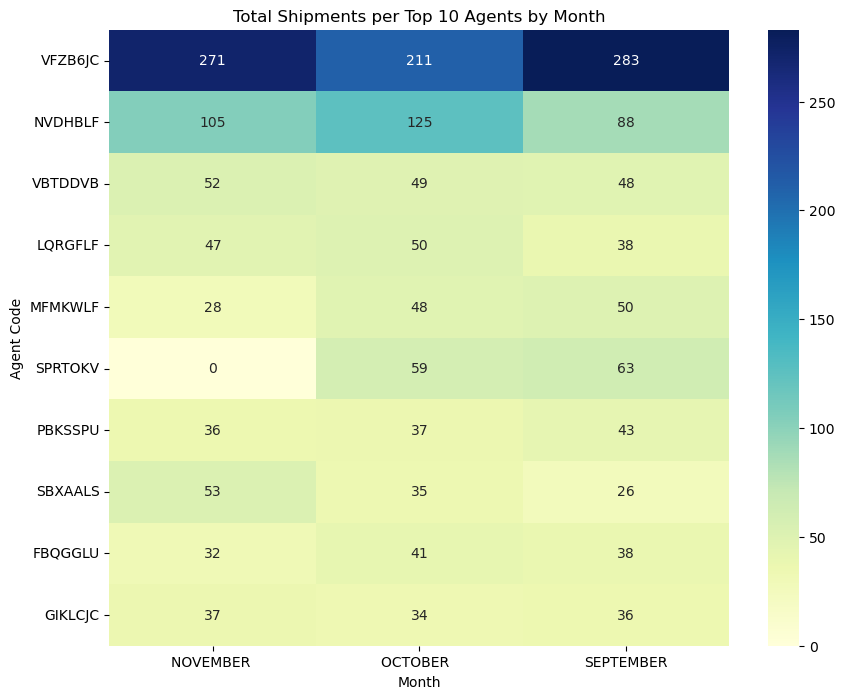

In [21]:
# Group by AgentCode and FlownMonth to count shipments
shipment_count_per_agent = new_df.groupby(['AgentCode', 'FlownMonth']).size().unstack(fill_value=0)

# Find the top 10 agents with the highest total shipments
top_10_agents_by_shipment = shipment_count_per_agent.sum(axis=1).nlargest(10).index

# Filter the dataset to include only the top 10 agents by shipment count
top_10_shipment_count = shipment_count_per_agent.loc[top_10_agents_by_shipment]

plt.figure(figsize=(10, 8))
sns.heatmap(top_10_shipment_count, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Total Shipments per Top 10 Agents by Month')
plt.xlabel('Month')
plt.ylabel('Agent Code')
plt.show()

The heatmap visualizes the total shipments per month for the top 10 agents, showing a clear pattern:

The agent VFZB6JC consistently leads in all three months (September, October, and November), making it the most important or dominant shipper among the agents. The number of shipments for VFZB6JC remains significantly higher than the other agents, indicating its prominent role in shipment volume throughout the period. This highlights VFZB6JC as a key player in the shipping network.

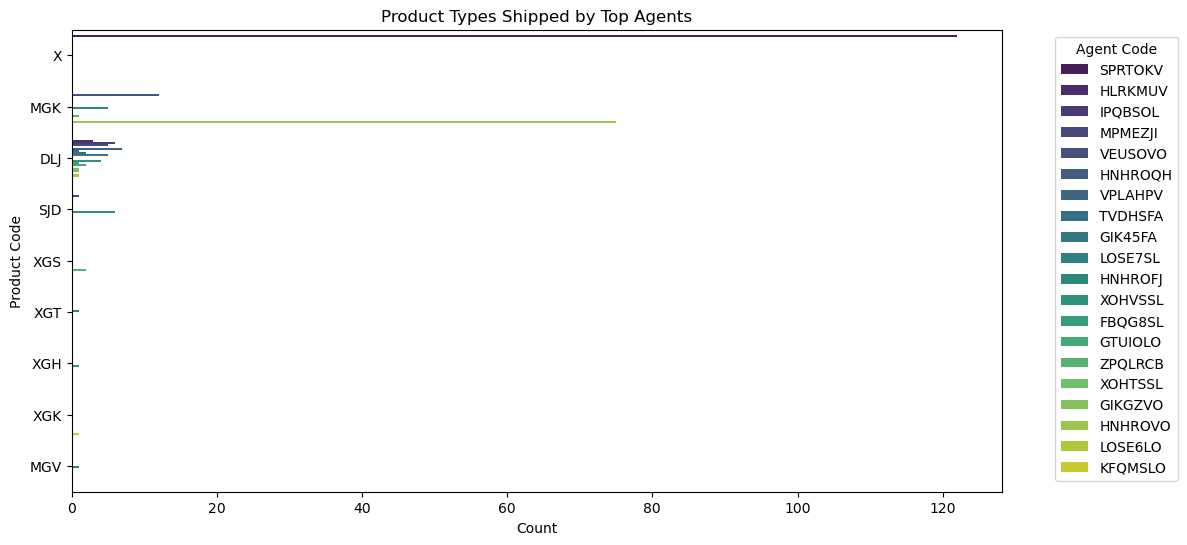

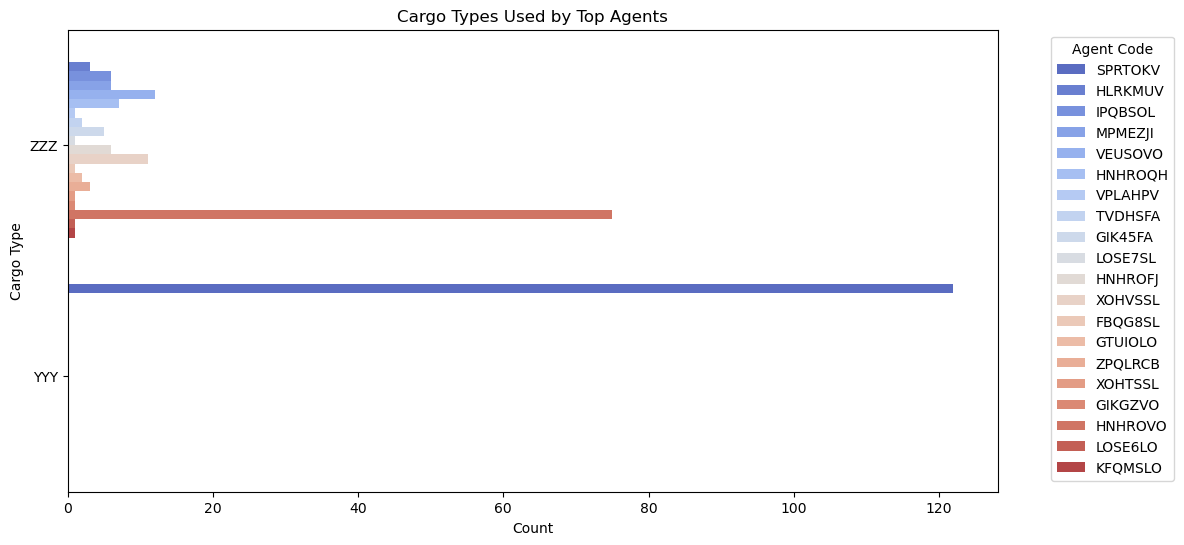

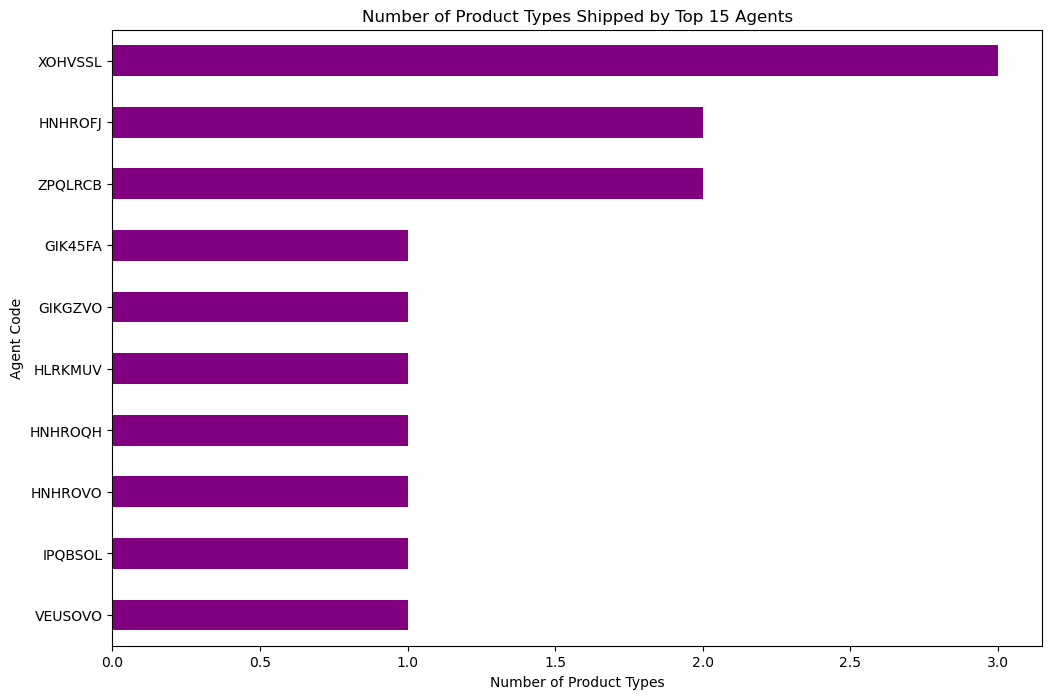

In [22]:

# Filter the dataset to include only the top 10 agents based on 'agent_impact'
top_agents = agent_impact[:20].index
filtered_df = new_df[new_df['AgentCode'].isin(top_agents)]

# Plot 1: Types of products shipped by these agents
plt.figure(figsize=(12, 6))
sns.countplot(y='ProductCode', data=filtered_df, order=filtered_df['ProductCode'].value_counts().index, hue='AgentCode', palette='viridis')
plt.title('Product Types Shipped by Top Agents')
plt.xlabel('Count')
plt.ylabel('Product Code')
plt.legend(title='Agent Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot 2: Types of cargo used by these agents
plt.figure(figsize=(12, 6))
sns.countplot(y='CargoType', data=filtered_df, order=filtered_df['CargoType'].value_counts().index, 
              hue='AgentCode', palette='coolwarm')

plt.title('Cargo Types Used by Top Agents')
plt.xlabel('Count')
plt.ylabel('Cargo Type')
plt.legend(title='Agent Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Filtering the dataset to include the top 15 agents based on 'agent_impact'
top_15_agents = agent_impact[:10].index
filtered_df_top_15 = new_df[new_df['AgentCode'].isin(top_15_agents)]
# Count the number of unique product types each agent ships
product_count_per_agent = filtered_df_top_15.groupby('AgentCode')['ProductCode'].nunique().sort_values(ascending=False)

# Plotting the adjusted bar plot
plt.figure(figsize=(12, 8))
product_count_per_agent.plot(kind='barh', color='purple')
plt.title('Number of Product Types Shipped by Top 15 Agents')
plt.xlabel('Number of Product Types')
plt.ylabel('Agent Code')
plt.gca().invert_yaxis()  
plt.show()


### Analysis of Agent HNHR0VO and Product MGK

- **HNHR0VO** exclusively ships **MGK**, which is in the **top 10 most expensive products**.
- HNHR0VO ranks among the **top 10 most expensive agents**, likely due to handling only high-value shipments.
- **DLJ** is the most shipped product but generates less revenue compared to MGK, reflecting its bulk/low-value nature.
- **SJD** follows a similar trend, being shipped by multiple agents with lower specialization and costs.

**Key Insight**: HNHR0VO's premium pricing aligns with MGK's high value, while DLJ's bulk strategy shows volume but less revenue impact.



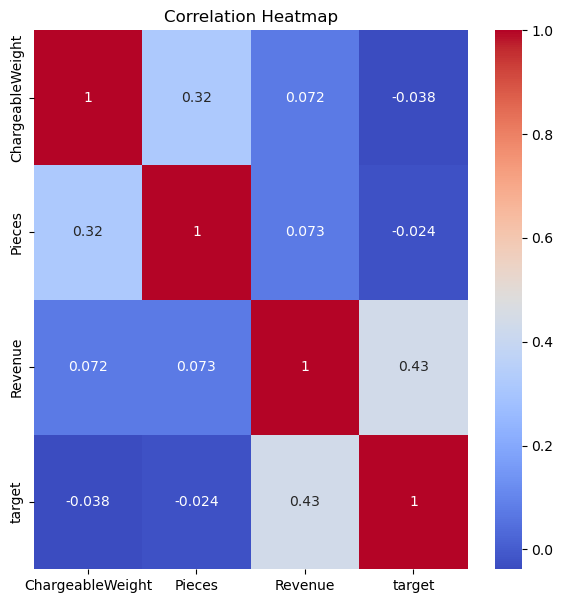

In [23]:
plt.figure(figsize=(7, 7))
sns.heatmap(new_df[['ChargeableWeight', 'Pieces', 'Revenue', 'target']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap shows that the current features do not have strong enough correlations to accurately predict the target, except for a moderate correlation with revenue. Therefore, feature engineering may be necessary to identify better predictors.


# Feature engineering:

We are creating two new features as part of **feature engineering**:

1. **Agent_Avg_Revenue**: This feature represents the average revenue generated by each agent. By including the average revenue per agent, we can capture the overall contribution of an agent to the revenue. This could help identify whether agents with higher average revenues have a consistent impact on pricing or profit margins, providing valuable insights into agent performance.

2. **Agent_Total_Weight**: This feature represents the total chargeable weight managed by each agent. Adding the total weight helps us understand the scale of operations for each agent, which may influence the costs and pricing strategies. Agents handling more weight might benefit from economies of scale, which could impact the model.

These engineered features will help provide a more nuanced understanding of each agent's impact on the target variable, potentially improving model performance by capturing relationships between agent-level metrics and shipment pricing.


In [24]:
agent_avg_revenue = new_df.groupby('AgentCode')['Revenue'].transform('mean')
new_df['Agent_Avg_Revenue'] = agent_avg_revenue

agent_total_weight = new_df.groupby('AgentCode')['ChargeableWeight'].transform('sum')
new_df['Agent_Total_Weight'] = agent_total_weight

In [25]:
# Average price per kg for each ProductCode
product_avg_price_per_kg = new_df.groupby('ProductCode')['target'].transform('mean')
new_df['Product_Avg_Price_per_kg'] = product_avg_price_per_kg

In [26]:
label_encoder_agent = LabelEncoder()
label_encoder_product = LabelEncoder()
label_encoder_flown = LabelEncoder()
label_encoder_cargo = LabelEncoder()
# Encode categorical features into numerical ones
new_df['AgentCode_encoded'] = label_encoder_agent.fit_transform(new_df['AgentCode'])
new_df['ProductCode_encoded'] = label_encoder_product.fit_transform(new_df['ProductCode'])
new_df['FlownMonth_encoded'] = label_encoder_flown.fit_transform(new_df['FlownMonth'])
new_df['CargoType_encoded'] = label_encoder_cargo.fit_transform(new_df['CargoType'])

# Checking numerical columns after feature engineering
numerical_columns = new_df.select_dtypes(include=['number']).columns
print(pd.DataFrame(numerical_columns))


                           0
0           ChargeableWeight
1                     Pieces
2                    Revenue
3                     target
4          Agent_Avg_Revenue
5         Agent_Total_Weight
6   Product_Avg_Price_per_kg
7          AgentCode_encoded
8        ProductCode_encoded
9         FlownMonth_encoded
10         CargoType_encoded


The new feature Product_Avg_Price_per_kg  provides the average price per kg for each product code helping us understand the typical revenue generated per unit weight for different products.


## Preparing the data for our model:

We are preparing the dataset for modeling by performing several important preprocessing steps. This includes removing outliers, which could bias the model, and encoding categorical features so they can be used effectively in a machine learning model.


In [27]:
# Make a copy of the dataset in case we need to preserve the original data
dataset = new_df.copy()
datasetout = new_df.copy()
# Drop rows with outliers that could bias the model due to their large deviation from the mean
dataset = dataset.drop(dataset[dataset['AgentCode'] == "GIKGZVO"].index)

This is the **second correlation heatmap** we are creating, focusing on evaluating the impact of the newly engineered features alongside the original features. By including newly created variables like `Agent_Avg_Revenue`, `Agent_Total_Weight`, and encoded categorical features, we aim to observe whether these additions bring stronger correlations with the **target** variable. This analysis will help us determine if the new features are likely to be **important predictors** and thus enhance our model's performance.


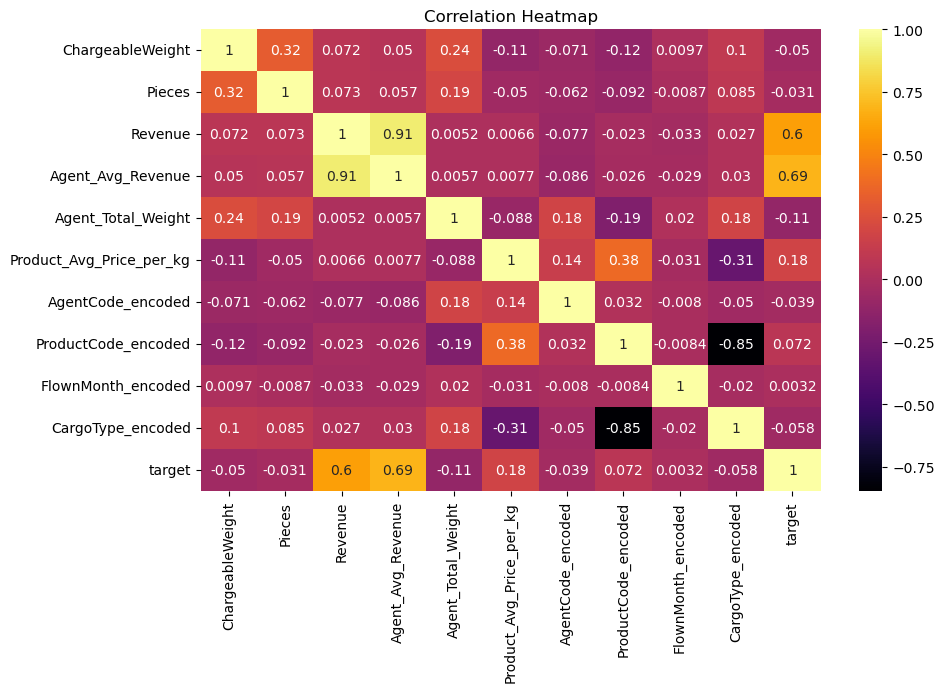

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[['ChargeableWeight', 'Pieces', 'Revenue', 'Agent_Avg_Revenue',
       'Agent_Total_Weight', 'Product_Avg_Price_per_kg','AgentCode_encoded', 
                     'ProductCode_encoded','FlownMonth_encoded', 'CargoType_encoded','target']].corr(), 
            annot=True, 
            cmap='inferno')

plt.title('Correlation Heatmap')
plt.show()

The newly engineered features, **`Agent_Avg_Revenue`** and **`Product_Avg_Price_per_kg`**, seem to add value in predicting the target as they both exhibit relatively strong correlations (`0.69` and `0.17`, respectively).

The encoded categorical features (**`AgentCode_encoded`**, **`ProductCode_encoded`**, **`FlownMonth_encoded`**) show **low correlation** with the target, meaning their direct impact is limited. However, these encoded features can still be useful for the model to identify relationships that might not be captured through simple correlation.

The heatmap helps us understand that **feature engineering** added more explanatory power, especially with **`Agent_Avg_Revenue`**, and it will be an important factor to consider during model training.


In [29]:
#not including revenue and cheargeable weight in X to avoid data leakeage 
X = dataset[['AgentCode_encoded', 'ProductCode_encoded', 'ChargeableWeight', 'Pieces', 'FlownMonth_encoded','Agent_Avg_Revenue', 'Agent_Total_Weight', 'Product_Avg_Price_per_kg', 'CargoType_encoded']]





#in the next line of code we removed Agent_avg_revenue to see how worse our models were going to be
#without this feature
#and yes it indeed lowered our model performance by about 20%
#at the end i still decided to keep it, but feel free to remove the # and re run the code to see 
#the difference without it on our models performance
#X = dataset[['AgentCode_encoded', 'ProductCode_encoded', 'ChargeableWeight', 'Pieces', 'FlownMonth_encoded', 'Agent_Total_Weight', 'Product_Avg_Price_per_kg', 'CargoType_encoded']]

y = dataset['target']

In [30]:
#X and y but with the outlier GIKGZVO
X_out = datasetout[['AgentCode_encoded', 'ProductCode_encoded', 'ChargeableWeight', 'Pieces', 'FlownMonth_encoded', 'Agent_Avg_Revenue', 'Agent_Total_Weight', 'Product_Avg_Price_per_kg', 'CargoType_encoded']]
        
#in the next line of code we removed Agent_avg_revenue to see how worse our models were going to be
#without this feature
#and yes it indeed lowered our model performance by about 20%
#at the end i still decided to keep it, but feel free to remove the # and re run the code to see 
#the difference without it on our models performance
                    
#X_out = datasetout[['AgentCode_encoded', 'ProductCode_encoded', 'ChargeableWeight', 'Pieces', 'FlownMonth_encoded', 'Agent_Total_Weight', 'Product_Avg_Price_per_kg', 'CargoType_encoded']]
y_out = datasetout['target']

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, 
                                                random_state=42)

In [32]:
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, y_out, test_size=0.27, 
                                                random_state=42)

In [33]:
#importing the necessary libraries for our models 
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

### Model Selection

We chose **Gradient Boosting Regressor**, **XGBoost Regressor**, and **Random Forest Regressor** due to the nature of our problem: predicting a continuous numeric value (regression task). These models are well-suited for regression because:

- **Gradient Boosting Regressor** and **XGBoost**:
  - Utilize boosting techniques to sequentially improve weak learners, creating a strong predictive model.
  - Effectively capture complex, non-linear relationships in the data.
  - Achieve high accuracy on complex datasets through optimization of loss functions.

- **Random Forest Regressor**:
  - Builds multiple decision trees and averages their predictions, reducing overfitting.
  - Handles feature interactions well and provides a robust, ensemble-based solution.

By comparing these models, we aim to identify the most effective one for our regression problem based on their performance.


In [34]:
#importing the necessary libraries for model validation
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score

### Evaluation Metrics for Regression Models

In evaluating the performance of regression models such as `GradientBoostingRegressor`, `XGBoost`, and `RandomForestRegressor`, it's crucial to choose metrics that provide meaningful insights into the model's predictive capabilities. The following metrics were selected:

---

#### 1. R-squared (R²)

- **Definition**: R² measures the proportion of variance in the dependent variable that is predictable from the independent variables.
- **Why Choose R²?**
  - **Interpretability**: It provides a clear indication of how well the independent variables explain the variability of the target variable.
  - **Model Fit**: An R² value closer to 1 suggests a better fit, indicating that the model explains a large portion of the variance.
  - **Comparative Analysis**: Useful for comparing the explanatory power of different models.

---

#### 2. Root Mean Squared Error (RMSE)

- **Definition**: RMSE is the square root of the average of squared differences between the predicted and actual values.
- **Why Choose RMSE?**
  - **Scale Sensitivity**: RMSE is in the same units as the target variable, making it easy to interpret the magnitude of errors.
  - **Error Magnitude**: It penalizes larger errors more than smaller ones due to the squaring of differences, which is helpful when large errors are particularly undesirable.
  - **Model Optimization**: Commonly used as a loss function for regression models, aiding in model tuning.

---



####  3. Mean Absolute Error (MAE)

- **Definition**: MAE calculates the average magnitude of errors between predicted and actual values, without considering their direction.
- **Why MAE is Useful:**
  - **Robustness to Outliers**: Unlike RMSE, MAE does not square the errors, so it is less sensitive to outliers.
  - **Interpretability**: Provides a straightforward average error magnitude, which is easy to understand.
  - **Balanced Error Perspective**: Offers a different viewpoint on model performance by treating all errors equally.


## Evaluation Using train test split method

In [35]:
import time

In [36]:

# Function to train and evaluate a given model and return performance metrics without having to redo it for each model 
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Start measuring training time
    start_time = time.time()  
    
    # Train the provided model on training data
    model.fit(X_train, y_train)  
    
    # Calculate the total time taken to train the model
    train_time = time.time() - start_time  
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)  

    # Calculate evaluation metrics: 
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Return the results as a dictionary for easy appending to the summary list
    return {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Training Time (s)': train_time
    }

# Initialize an empty list to store the evaluation results of each model
results = []

# Example models to evaluate
models = [
    ('XGBoost', xgb.XGBRegressor(n_estimators=450, max_depth=4, learning_rate=0.1, random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=500, max_depth=6, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=450, max_depth=4, learning_rate=0.1, random_state=42))
]

# Evaluate each model on both datasets
for model_name, model in models:
    # Evaluate on the dataset without the outlier
    result = train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name + ' (No Outlier)')
    results.append(result)
    
    # Evaluate on the dataset with the outlier
    result_out = train_and_evaluate_model(model, X_train_out, y_train_out, X_test_out, y_test_out, model_name + ' (With Outlier)')
    results.append(result_out)

# Convert results to a DataFrame for easier visualization
results_dfi = pd.DataFrame(results)


We are defining a reusable function that takes a model, trains it, evaluates it, and returns the results. This function allows us to apply the same process consistently across different models while avoiding repetitive code. By using this function, we can easily track key metrics—such as training time, RMSE, MAE and R2 score**—for each model, and store these results in an organized way for later comparison. The use of an empty list (`results`) ensures that we can gather the metrics from each model to create a summary DataFrame that facilitates easy model evaluation and selection.


## Evaluation Using Cross-Validation
To enhance the robustness of our evaluation, we now use cross-validation (with 5 folds) instead of a simple train-test split. This approach helps verify the stability and reliability of the models' performance.


In [37]:
# Function to train and evaluate a given model using cross-validation and return performance metrics
def train_and_evaluate_model_cv(model, X, y, cv, model_name):
    start_time = time.time()  
    
    # Cross-validation and get scores (negative MSE is converted to positive RMSE)
    neg_mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    rmse_scores = np.sqrt(-neg_mse_scores)
    
    # Calculate the average R2 score across all folds
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2', n_jobs=-1)
    
    # Calculate the average MAE score across all folds
    neg_mae_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
    mae_scores = -neg_mae_scores  # Convert negative MAE to positive

    train_time = time.time() - start_time  

    return {
        'Model': model_name,
        'Mean RMSE': rmse_scores.mean(),
        'Std RMSE': rmse_scores.std(),
        'Mean R2': r2_scores.mean(),
        'Mean MAE': mae_scores.mean(),
        'Std MAE': mae_scores.std(),
        'Training Time (s)': train_time
    }

# Initialize an empty list to store the evaluation results of each model for cross-validation
cv_results = []

# Cross-validation setup (KFold with 5 splits)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model using cross-validation for both datasets
for model_name, model in models:
    # Evaluate on the dataset without the outlier
    result_cv = train_and_evaluate_model_cv(model, X, y, kfold, model_name + ' (No Outlier)')
    cv_results.append(result_cv)
    
    # Evaluate on the dataset with the outlier
    result_cv_out = train_and_evaluate_model_cv(model, X_out, y_out, kfold, model_name + ' (With Outlier)')
    cv_results.append(result_cv_out)

# Convert results to a DataFrame
cv_results_df = pd.DataFrame(cv_results)



In [38]:

#models with fine-tuned parameters
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=450, max_depth=4, learning_rate=0.1, random_state=42)
randomf_model = RandomForestRegressor(n_estimators=500, max_depth=6, random_state=42)
grad_model = GradientBoostingRegressor(n_estimators=450, max_depth=4, learning_rate=0.1, random_state=42)

# Models list
models = [
    ('XGBoost', xgb_model),
    ('Random Forest', randomf_model),
    ('Gradient Boosting', grad_model)
]

In [39]:
#printing out the result that we got for XGBOOST, RANDOM FOREST AND GRADIENT BOOSTING when we try 
#train_test_split method

print(results_dfi)

                              Model       RMSE       MAE        R2  \
0              XGBoost (No Outlier)  10.943477  2.065710  0.957354   
1            XGBoost (With Outlier)  63.726124  3.555980 -0.289166   
2        Random Forest (No Outlier)  13.746990  3.401040  0.932704   
3      Random Forest (With Outlier)  16.701565  3.667253  0.911450   
4    Gradient Boosting (No Outlier)  10.681467  2.062220  0.959371   
5  Gradient Boosting (With Outlier)  10.774633  2.124859  0.963146   

   Training Time (s)  
0           0.216431  
1           0.348970  
2           4.101234  
3           4.318053  
4           3.863039  
5           4.021164  


In [40]:
#printing out the result that we got for XGBOOST, RANDOM FOREST AND GRADIENT BOOSTING when we try 
#cross_validation method


print(cv_results_df)

                              Model  Mean RMSE   Std RMSE   Mean R2  Mean MAE  \
0              XGBoost (No Outlier)  10.503596   1.440348  0.952765  2.039115   
1            XGBoost (With Outlier)  33.014895  36.413181  0.756740  2.764678   
2        Random Forest (No Outlier)  14.191151   3.980004  0.911826  3.360044   
3      Random Forest (With Outlier)  35.340912  37.465736  0.741837  4.047683   
4    Gradient Boosting (No Outlier)  10.261367   1.393032  0.955997  1.882719   
5  Gradient Boosting (With Outlier)  29.603952  39.343632  0.804755  2.505723   

    Std MAE  Training Time (s)  
0  0.206048           6.420478  
1  1.120375           2.139114  
2  0.548016          22.472810  
3  0.987760          20.799755  
4  0.183258          17.568835  
5  1.162996          17.068321  


### Model Evaluation Summary

This analysis compares the performance of three models: **XGBoost**, **Random Forest**, and **Gradient Boosting**, evaluated with and without an outlier in the dataset. The models were tested using both **Train-Test Split** and **Cross-Validation** to assess stability and robustness. Below are the main findings:

---

#### **1. Train-Test Split vs. Cross-Validation**

- **Train-Test Split** results provide a one-time assessment of the model's performance on a specific train-test partition.
- **Cross-Validation** results show average performance across multiple folds, which better captures how the model might perform on unseen data.

#### **2. Impact of Outliers**

- Models trained with the **outlier** generally performed **worse** than those trained without it.
- The **RMSE** and **MAE** values increased significantly for models with the outlier, indicating higher error rates.
- **XGBoost** was particularly affected by the outlier, with its **R²** dropping significantly from **0.95** to **0.76** in cross-validation. The standard deviation of RMSE also became very high, indicating instability.

#### **3. Best Model Selection**

- Across all metrics, the **Gradient Boosting Regressor (No Outlier)** showed the best performance:
  - **Train-Test Split**: RMSE = **10.68**, R² = **0.96**, MAE = **2.06**
  - **Cross-Validation**: Mean RMSE = **10.26**, Mean R² = **0.96**, Mean MAE = **1.88**
  - The low RMSE and high R² indicate that Gradient Boosting effectively captures the variance in the target variable without overfitting.
- **XGBoost (No Outlier)** also performed well, but **Gradient Boosting** had a slight edge in stability, as shown by the lower **standard deviation** of RMSE during cross-validation.

#### **4. Observations on Models with Outliers**

- The **outlier** had a major impact on model performance, leading to a large increase in RMSE and a decrease in R².
- The **Random Forest** and **XGBoost** models had especially high **standard deviation** for RMSE during cross-validation, indicating sensitivity to outliers.
- **Gradient Boosting (With Outlier)** still managed to provide relatively stable performance, with a smaller drop in R² and lower standard deviation compared to other models.

#### **5. Recommendation**

- For the dataset **without the outlier**, **Gradient Boosting** is the preferred model due to its strong generalization and lower error rates.
- The inclusion of the outlier significantly degrades performance for all models. Thus, **outlier removal or handling** is recommended for better predictive accuracy and model stability.

### Summary of Results

| Model                          | Evaluation Strategy | Best Metric (RMSE) | R²        | Impact of Outlier  |
|--------------------------------|---------------------|---------------------|-----------|--------------------|
| XGBoost (No Outlier)           | Train-Test / CV     | 10.50 / 10.94       | 0.95      | Sensitive          |
| XGBoost (With Outlier)         | Train-Test / CV     | 63.72 / 33.01       | -0.29 / 0.76 | Highly Impacted |
| Random Forest (No Outlier)     | Train-Test / CV     | 13.75 / 14.19       | 0.93      | Impacted           |
| Random Forest (With Outlier)   | Train-Test / CV     | 16.70 / 35.34       | 0.91 / 0.74 | Highly Impacted |
| Gradient Boosting (No Outlier) | Train-Test / CV     | 10.68 / 10.26       | 0.96      | Least Impacted     |
| Gradient Boosting (With Outlier)| Train-Test / CV    | 10.77 / 29.60       | 0.96 / 0.80 | Stable Compared to Others |

Based on the metrics above, **Gradient Boosting without the outlier** emerges as the most effective and stable model for this task.


# Model Evaluation Summary Without `agent_avg_revenue`

This section compares the performance of the models—XGBoost, Random Forest, and Gradient Boosting—when the feature `agent_avg_revenue` was excluded from the dataset. Both Train-Test Split and Cross-Validation methods were employed for evaluation, and the results indicate a notable degradation in performance.

### Results Without `agent_avg_revenue`

#### Train-Test Split Results

| Model                          | RMSE       | MAE        | R²        |
|--------------------------------|------------|------------|-----------|
| XGBoost (No Outlier)          | 16.17      | 3.92       | 0.91      |
| XGBoost (With Outlier)        | 87.72      | 6.44       | -1.44     |
| Random Forest (No Outlier)    | 20.77      | 5.96       | 0.85      |
| Random Forest (With Outlier)  | 45.30      | 8.05       | 0.35      |
| Gradient Boosting (No Outlier) | 12.54      | 3.09       | 0.94      |
| Gradient Boosting (With Outlier)| 43.47      | 4.06       | 0.40      |

#### Cross-Validation Results

| Model                          | Mean RMSE  | Std RMSE   | Mean R²   | Mean MAE  |
|--------------------------------|------------|------------|-----------|-----------|
| XGBoost (No Outlier)          | 16.91      | 1.79       | 0.88      | 4.09      |
| XGBoost (With Outlier)        | 39.00      | 37.01      | 0.67      | 4.91      |
| Random Forest (No Outlier)    | 21.41      | 3.29       | 0.81      | 5.98      |
| Random Forest (With Outlier)  | 51.03      | 32.90      | 0.35      | 7.62      |
| Gradient Boosting (No Outlier) | 14.12      | 1.87       | 0.91      | 3.03      |
| Gradient Boosting (With Outlier)| 55.45      | 36.64      | -0.02     | 4.56      |

### Observations
1. **Performance Decline**: The exclusion of `agent_avg_revenue` resulted in an increase in RMSE and MAE values across all models, indicating a decrease in predictive accuracy.
2. **Impact on XGBoost**: The performance of XGBoost, particularly with the outlier, dropped significantly, as evidenced by an RMSE of 87.72 and a negative R² value, suggesting a poor fit.
3. **Gradient Boosting Resilience**: Although Gradient Boosting (No Outlier) performed best among the models without `agent_avg_revenue`, its overall performance still degraded compared to previous results with the feature included.

### Conclusion
The removal of the `agent_avg_revenue` feature negatively impacted model performance, demonstrating its importance in accurately predicting the target variable. It is recommended to retain this feature for future modeling efforts to ensure optimal predictive capability.


In [41]:
# This function tests the performance of the regression model by selecting a random row 
# from the dataset. It extracts the features and the true target value for that row, 
# makes a prediction using the trained model, and calculates the absolute error 
# between the predicted and true values. This helps us understand how well our model is 
# predicting individual instances from the dataset.


In [42]:

# Combine X and y to make it easier to select a random row
dataset = X.copy()
dataset['target'] = y

# Function to select a random row and test the model for regression
def test_random_row_regression(model, X, y):
    # Select a random index from the dataset
    random_index = np.random.randint(0, len(X))
    
    # Extract the random row and its true target value
    random_row = X.iloc[random_index:random_index+1]
    true_value = y.iloc[random_index]
    
    # Make a prediction using the model
    predicted_value = model.predict(random_row)[0]
    
    # Calculate the absolute error (or any other metric you'd like)
    absolute_error = abs(predicted_value - true_value)
    
    print(f"Random Index: {random_index}")
    print(f"True Value: {true_value}")
    print(f"Predicted Value: {predicted_value}")
    print(f"Absolute Error: {absolute_error:.2f}")

# Example usage
test_random_row_regression(model, X, y)


Random Index: 6898
True Value: 0.38333333333333336
Predicted Value: 0.4030369245209027
Absolute Error: 0.02
